In [3]:
import numpy as np
X = 2* np.random.rand(100,1)
y= 4+ 3 * X + np.random.randn(100,1)

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

Text(0, 0.5, 'y')

In [5]:
#Using the normal equation of regression to calculate the Theta. Numpy's linalg is used to calculate inverse of matrix.
# Theta = (XT X)^ -1  XT y
X_b = np.c_[np.ones((100,1)),X]  # adding X0 as 1 to each X instance.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.79756247],
       [3.2224189 ]])

In [6]:
#We calculated the Theta for our data set. Let us make predictions now.
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # adding X0 to the instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.79756247],
       [10.24240027]])

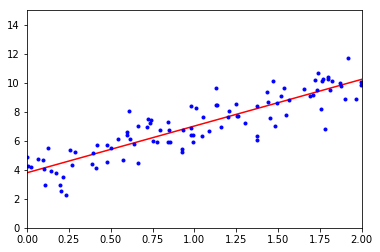

In [7]:
#Plotting the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
#Performing the Linear Regression with sklearn which uses the Singular Value Decomposition(SVD) of matrix to calculate
# the inverse.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.79756247]), array([[3.2224189]]))

In [9]:
#Answer of the above is same as the NOrmal equation. we can directly call the scipy.linalg.lstsq() to calcuate Theta on
#which the sklear finction is based on as:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond =1e-6)
theta_best_svd

array([[3.79756247],
       [3.2224189 ]])

In [10]:
#Another way to calculate wit normal equation is pseudo inverse
np.linalg.pinv(X_b).dot(y)

array([[3.79756247],
       [3.2224189 ]])

In [11]:
#Implementing the Batch gradient descent for Linear regression
eta = 0.1    #learning rate
n_iterations = 1000
m =100   #number of instances
theta = np.random.randn(2,1) #random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta- eta * gradients
theta

array([[3.79756247],
       [3.2224189 ]])

In [12]:
#Implementing Stochastic gradient descent for Linear regression
n_epochs = 50
t0 , t1 = 5, 50 #learning schedule to decrease the learning rate slowly with each epoch
def learning_schedule(t):
    return t0/(t +t1)

theta = np.random.randn(2,1) #random initialization
for epoch in range (n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index +1]
        yi = y[random_index: random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch* m + i)
        theta = theta - eta * gradients
theta

array([[3.80921249],
       [3.20370138]])

In [13]:
#The stochastic gradient descent can be implemented using sklearn's SGDRegressor.
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.76660035]), array([3.1694299]))

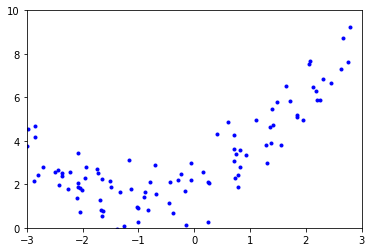

In [14]:
#Ploynomial regression
m =100
X = 6*np.random.rand(m,1)-3
y = 0.5 * X**2 + X +2 + np.random.randn(m,1)
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()

In [15]:
#As the straight line cannot fit this, we use sklearn's PolynomialFeatures class to transform training data, adding
# the square of each feature in the training as new feature.
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.25724923])

In [16]:
X_poly[0]

array([-1.25724923,  1.58067562])

In [17]:
#Now we can fit a Linear Regression model to this extended training data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9404794]), array([[1.04857665, 0.52023524]]))

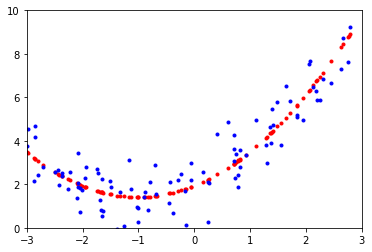

In [18]:
y_pred = lin_reg.predict(X_poly)
#Plotting the predictions
plt.plot(X, y_pred, "r.")
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.show()

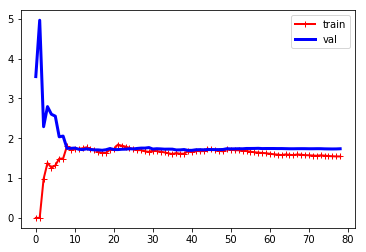

In [19]:
#Plotting Learning curves on the model trained several times on different sized subset of the training data.
#This is done to select that the degree of polynomial selected for the model is appropriate. It is not overfitting as
#well as underfitting.
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth =2, label ="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth =3, label="val")
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

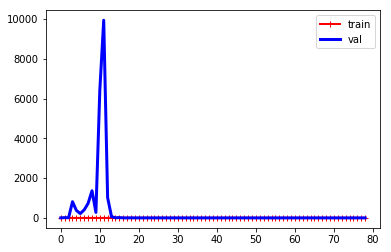

In [20]:
#The model is underfitting. Plotting the curves by using degree 10 polynomial instead of linear.
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features" , PolynomialFeatures(degree =10, include_bias = False)),
                                 ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X,y)

In [21]:
#Above model is much better as it is not overfitting as well as not underfitting.

In [23]:
#Reguilarized Linear Models
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha =1, solver = "cholesky")   #Alpha is the parameter for regul;arisation term, cholesky is the 
#the method to use matrix factorization.
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.79853581]])

In [24]:
#Using stochastic gradient descent with ridge regularization.
sgd_reg = SGDRegressor(penalty ="l2")  #L2 is the regulariztin which is half the square of l2 norm of weight vector
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.70638459])

In [25]:
#Lasso regression: It uses the l1 norm of the weight vector. Instead of half the square, it uses the weight. It enables
#removal of least important features as it puts more weightage to those weights.
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.74274649])

In [26]:
#Using stochastic gradient descent with lasso regularization.
lasso_sgd_reg = SGDRegressor(penalty="l1")
lasso_sgd_reg.fit(X,y.ravel())
lasso_sgd_reg.predict([[1.5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([3.72795254])

In [27]:
#Elastic Net: It is the regularization which uses btih the lasso and ridge regression. It controls the mix ratio of
#both the regularizations by using "r". If r=0, it equals ridge, if r=1, it equals to lasso regularization.
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  #l1_ratios is the mix ration "r".
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.74646116])

In [39]:
#Another way of regularization of iterative moidels is early stopping. We stop the iterations when the validation error
#as well as training error is minimum.
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X, test_size = 0.2, random_state = 42)
y_train, y_val = train_test_split(y, test_size = 0.2, random_state = 42)
#prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol =-np.infty, warm_start=True, penalty = None, learning_rate = "constant",
                      eta0=0.0005)
#warm_start =True is used in above model initialization as it resumes the training where it left off, instead of
#starting from the scratch.
minimum_val_error= float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [40]:
best_epoch, minimum_val_error

(54, 0.7312932948584221)

In [41]:
#Logistic regression on iris data set
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [44]:
X=iris["data"][:, 3:] #taking petal width
y= (iris["target"]==2).astype(np.int) #1 if Iris virginica, else 0

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

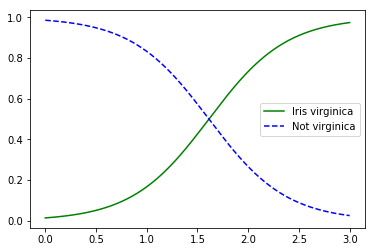

In [48]:
#Let's look at the model's estimated probabilities for flowers with petal width varying from 0 to 3 cm.
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label ="Not virginica")
plt.legend()

In [54]:
#As we can see, flowers with petal width higher than 1.5 cm, have the probability to be Virginica, and lower width
#are not Virginica. 
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [55]:
#In above result, petal width 1.7 is predicted as virginica and other one as not viirginica.
#Similar to the linear regression, we can use penalties or regularization l1 & l2 in logistic regression.
#Unlike other models, LogisticRegression does not have alpha. It has inverse C. The higher the value of C, lower
#the regularization.

In [56]:
#Softmax Regression: Logistic regression can ve generalized to support multiple classes directly, without having to
#train and combine multiple binary classifiers. This is called Softmax or multinomial logistic regression.
X = iris["data"][:,(2,3)] #petal length, petal width
y=iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
#Here, multi_class = multinomial makes the logisticregression as softmax. C is the l2 regularization.
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
softmax_reg.predict([[5,2]])

array([2])

In [59]:
softmax_reg.predict_proba([[5,2]]) #shows probability of this flower of width 2 and length 5 to be of these classes.

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])